<a href="https://colab.research.google.com/github/malliswar/gpt_mail/blob/main/Shrimp_R3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train= ImageDataGenerator(rescale=1/255)

In [4]:
validation = ImageDataGenerator(rescale=1/255)

In [11]:
#train_dataset = train.flow_from_directory(r"/content/drive/Shareddrives/Major_Project/Image_dataset/train/",target_size=(200,200),batch_size =3, class_mode='binary')
train_dataset = train.flow_from_directory(
    r"/content/drive/MyDrive/Work/Image_dataset/train",
    target_size=(200, 200),  # EfficientNetB0 requires 224x224
    batch_size=3,
    class_mode='binary'
)

Found 154 images belonging to 2 classes.


In [18]:
#validation_dataset = train.flow_from_directory(r"/content/drive/Shareddrives/Major_Project/Image_dataset/valid",target_size=(200,200),batch_size =3, class_mode='binary')
validation_dataset = validation.flow_from_directory(
    r"/content/drive/MyDrive/Work/Image_dataset/valid",
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

Found 31 images belonging to 2 classes.


In [19]:
train_dataset.class_indices

{'healthy': 0, 'wssv': 1}

In [20]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation ='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation ='sigmoid')
                                   ])

In [22]:
model.compile(loss= 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [23]:
modelfit = model.fit(train_dataset,
                    steps_per_epoch=64,
                    epochs=35,
                    validation_data = validation_dataset)

Epoch 1/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - accuracy: 0.7132 - loss: 0.8828 - val_accuracy: 0.8387 - val_loss: 0.4134
Epoch 2/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7806 - loss: 0.5521 - val_accuracy: 0.8387 - val_loss: 0.4510
Epoch 3/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.7719 - loss: 0.5684 - val_accuracy: 0.7419 - val_loss: 0.4595
Epoch 4/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7798 - loss: 0.4812 - val_accuracy: 0.8387 - val_loss: 0.2941
Epoch 5/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.8667 - loss: 0.3263 - val_accuracy: 0.9032 - val_loss: 0.2385
Epoch 6/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9255 - loss: 0.1853 - val_accuracy: 1.0000 - val_loss: 0.1416
Epoch 7/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9735 - loss: 0.1133 - val_accuracy: 1.0000 - val_loss: 0.0462
Epoch 8/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9908 - loss: 0.1162 - val_accuracy: 1.0000 -

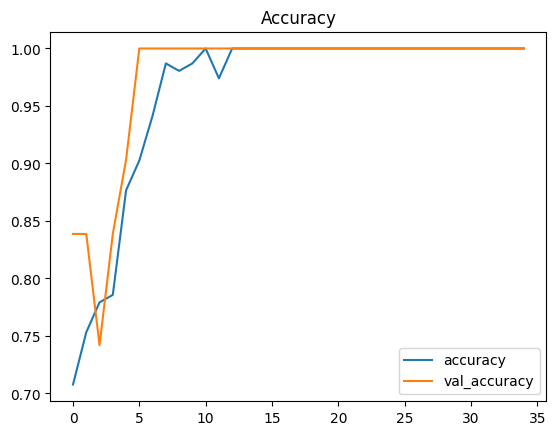

In [24]:
pd.DataFrame(modelfit.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

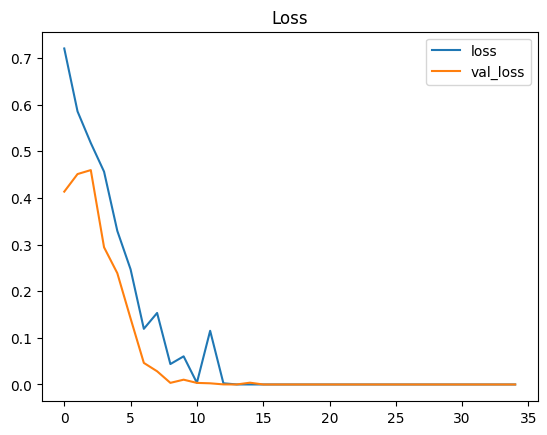

In [25]:
pd.DataFrame(modelfit.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [26]:
# Save the model (optional)
model.save('/content/drive/MyDrive/Work/Image_dataset/shrimp_model.h5')

#### Efficient Model

In [31]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from keras.layers import GlobalAveragePooling2D, Flatten,Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D,GlobalMaxPool2D
from tensorflow.keras.models import Model

In [48]:
base_model1 = EfficientNetB0	(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)

for layer in base_model1.layers[:15]:
    layer.trainable = False
x = base_model1.output
x = GlobalMaxPool2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions1 = Dense(1, activation='sigmoid')(x)
#model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

In [49]:
#Using previous model to improve accuracy
model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

In [50]:
model1.compile(loss= 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [51]:
#train_dataset = train.flow_from_directory(r"/content/drive/Shareddrives/Major_Project/Image_dataset/train/",target_size=(200,200),batch_size =3, class_mode='binary')
train_dataset = train.flow_from_directory(
    r"/content/drive/MyDrive/Work/Image_dataset/train",
    target_size=(224, 224),  # EfficientNetB0 requires 224x224
    batch_size=3,
    class_mode='binary'
)

Found 154 images belonging to 2 classes.


In [52]:
#validation_dataset = train.flow_from_directory(r"/content/drive/Shareddrives/Major_Project/Image_dataset/valid",target_size=(200,200),batch_size =3, class_mode='binary')
validation_dataset = validation.flow_from_directory(
    r"/content/drive/MyDrive/Work/Image_dataset/valid",
    target_size=(224, 224),
    batch_size=3,
    class_mode='binary'
)

Found 31 images belonging to 2 classes.


In [53]:
modelfit = model1.fit(train_dataset,
                    steps_per_epoch=64,
                    epochs=35,
                    validation_data = validation_dataset)




Epoch 1/35


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_504']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


51/64 ━━━━━━━━━━━━━━━━━━━━ 7s 580ms/step - accuracy: 0.5838 - loss: 8.0827

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


64/64 ━━━━━━━━━━━━━━━━━━━━ 97s 647ms/step - accuracy: 0.5997 - loss: 7.3552 - val_accuracy: 0.8387 - val_loss: 0.7901
Epoch 2/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.7132 - loss: 1.2427 - val_accuracy: 0.8387 - val_loss: 8.6339
Epoch 3/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.6907 - loss: 1.2334 - val_accuracy: 0.8387 - val_loss: 0.4788
Epoch 4/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.8379 - loss: 0.6738 - val_accuracy: 0.8387 - val_loss: 0.5397
Epoch 5/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.8143 - loss: 0.5414 - val_accuracy: 0.7097 - val_loss: 1.1736
Epoch 6/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.7418 - loss: 0.6738 - val_accuracy: 0.8387 - val_loss: 0.4459
Epoch 7/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.7868 - loss: 0.5903 - val_accuracy: 0.8065 - val_loss: 0.4605
Epoch 8/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.7927 - loss: 0.5823 - val_accuracy: 0.8387 - val_lo

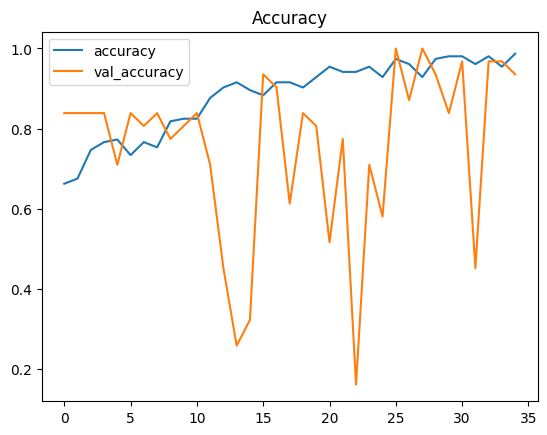

In [57]:
# Accuracy plot
pd.DataFrame(modelfit.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

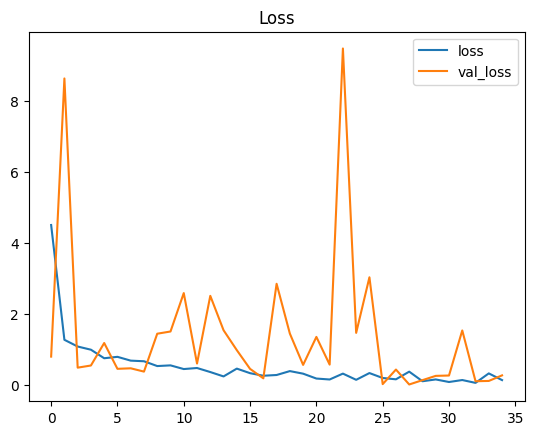

In [56]:
pd.DataFrame(modelfit.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

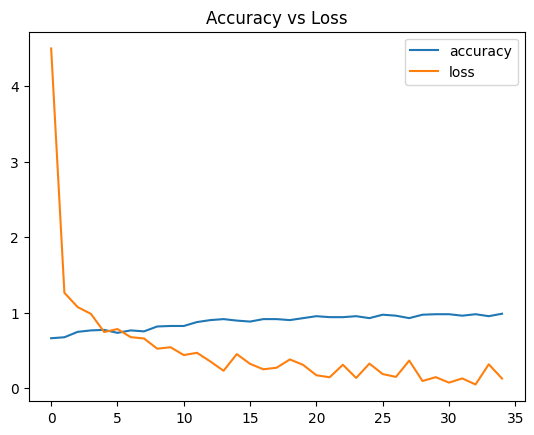

In [54]:
pd.DataFrame(modelfit.history)[['accuracy','loss']].plot()
plt.title("Accuracy vs Loss")
plt.show()

In [55]:
# Save the model

model.save('/content/drive/MyDrive/Work/Image_dataset/shrimp_Efficient_model.h5')

#### Testing the Model

In [59]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [60]:
# Load the saved model
model = load_model('/content/drive/MyDrive/Work/Image_dataset/shrimp_Efficient_model.h5')

In [63]:
def predict_shrimp_disease(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image

    # Make prediction
    prediction = model.predict(img_array)

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Show prediction
    if prediction[0][0] > 0.5:
        result = f'Infected (Confidence: {prediction[0][0]:.2%})'
    else:
        result = f'Healthy (Confidence: {(1-prediction[0][0]):.2%})'

    plt.title(result)
    plt.show()

    return prediction[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


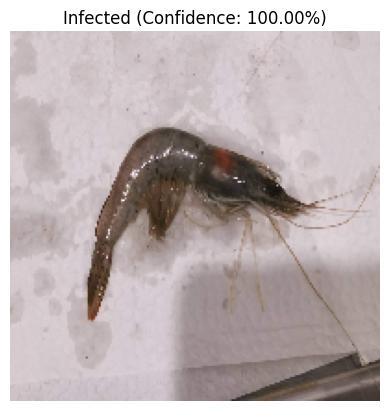

In [69]:

# Example usage:
# Test with a single image
image_path = '/content/drive/MyDrive/Work/Image_dataset/test/wssv/wssv-17_jpg.rf.d9df90be02b816c65c98f67ae3d028e7.jpg'  # Replace with your image path
prediction = predict_shrimp_disease(image_path)

#### Generated Code

In [2]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalMaxPool2D
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [3]:
# Create data generators
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [4]:

# Load datasets
train_dataset = train.flow_from_directory(
    r"/content/shrimp_project/Image_dataset/train/",
    target_size=(224, 224),  # EfficientNetB0 requires 224x224
    batch_size=3,
    class_mode='binary'
)

Found 155 images belonging to 3 classes.


In [7]:
validation_dataset = validation.flow_from_directory(
    r"/content/shrimp_project/Image_dataset/valid",
    target_size=(224, 224),
    batch_size=3,
    class_mode='binary'
)

Found 26 images belonging to 3 classes.


In [9]:
# Create EfficientNetB0 model
base_model1 = EfficientNetB0(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# Freeze first 15 layers
for layer in base_model1.layers[:15]:
    layer.trainable = False

In [11]:
# Add custom layers
x = base_model1.output
x = GlobalMaxPool2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions1 = Dense(1, activation='sigmoid')(x)

In [12]:
# Create final model
model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

In [13]:

# Compile model
model1.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:

# Train model
modelfit = model1.fit(
    train_dataset,
    steps_per_epoch=64,
    epochs=35,
    validation_data=validation_dataset
)


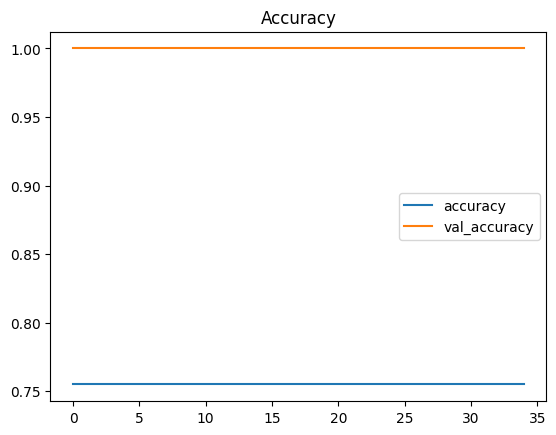

In [20]:
# Plot training results
# Accuracy plot
pd.DataFrame(modelfit.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

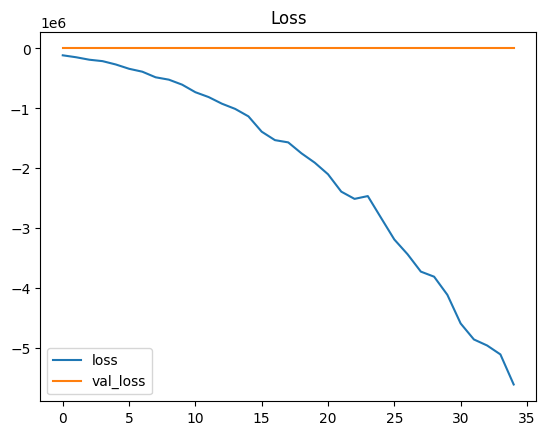

In [21]:
# Loss plot
pd.DataFrame(modelfit.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

# Save the model (optional)
model1.save('/content/shrimp_project/shrimp_efficientnet_model.h5')

In [ ]:
pd.DataFrame(modelfit.history)[['loss','val_loss']]